**DIGIT RECOGNITION**



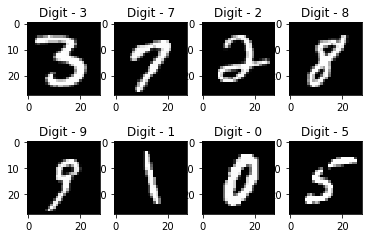

Digit Recognition project aims to create
a system capable of accurately
identifying handwritten digits. We start
by collecting a dataset of handwritten
digit images, such as the MNIST dataset,
labeled with their corresponding digits.
Preprocessing techniques like
normalization and resizing are applied to
standardize the images. Feature
extraction methods, such as pixel
intensities or more advanced techniques
like Histogram of Oriented Gradients
(HOG), are used to capture relevant
information from the images. Machine
learning models, such as Support Vector
Machines (SVM), Random Forests, or
deep learning architectures like
Convolutional Neural Networks (CNNs),
are trained on the extracted features to
classify digits. The model's performance
is evaluated using metrics like accuracy
and confusion matrix. We fine-tune the
model and optimize hyperparameters to
improve its accuracy. Finally, we deploy
the trained model into a real-world
application where it can accurately

recognize handwritten digits in real-
time.

**Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

**Load the Data**



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


**Get train and test data**

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Training and Prediction**


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 108ms/step - accuracy: 0.8618 - loss: 0.4850 - val_accuracy: 0.9796 - val_loss: 0.0661
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 111ms/step - accuracy: 0.9826 - loss: 0.0565 - val_accuracy: 0.9856 - val_loss: 0.0463
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9840 - val_loss: 0.0497
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9917 - loss: 0.0277 - val_accuracy: 0.9907 - val_loss: 0.0277
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 109ms/step - accuracy: 0.9935 - loss: 0.0222 - val_accuracy: 0.9897 - val_loss: 0.0309


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9858 - loss: 0.0390

Test Accuracy: 98.97%


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Confusion Matrix:
 [[ 974    0    0    0    0    0    0    3    1    2]
 [   0 1122    1    2    0    0    2    3    5    0]
 [   0    1 1021    1    2    0    0    6    1    0]
 [   0    0    0  999    0    4    0 

**Predictions**

In [ ]:
def plot_sample(image, prediction, actual):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {prediction}, Actual: {actual}")
    plt.axis('off')
    plt.show()


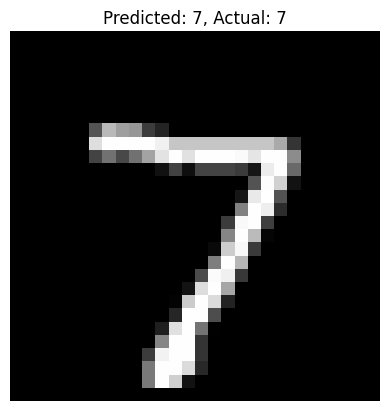

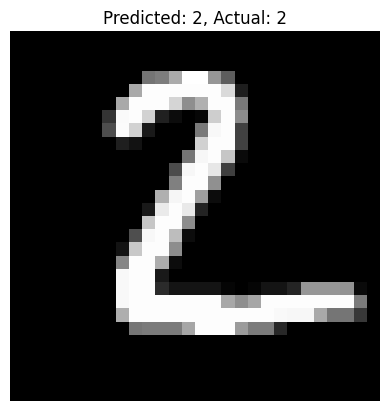

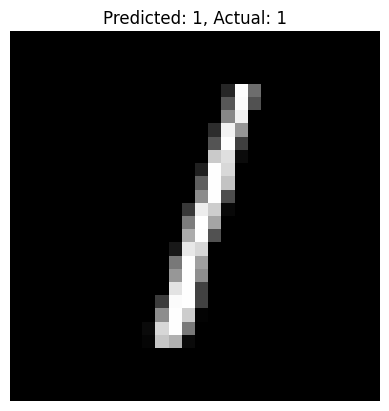

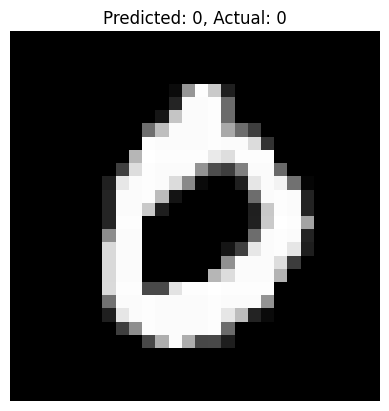

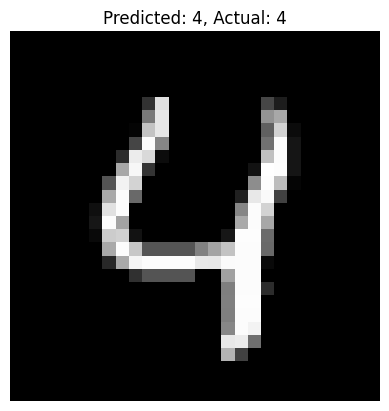

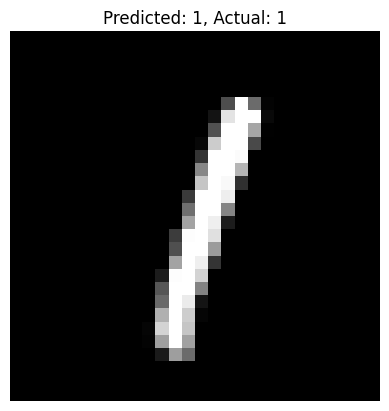

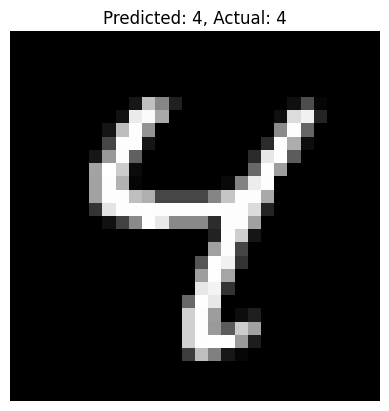

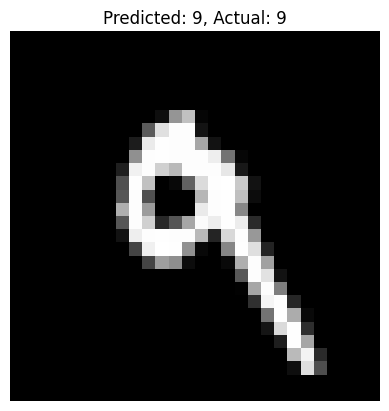

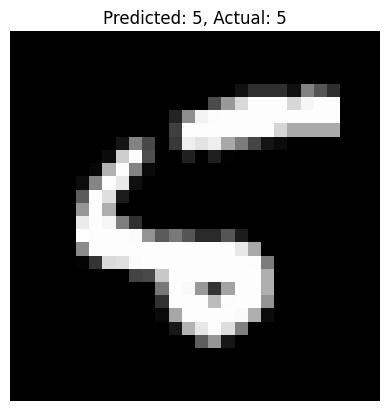

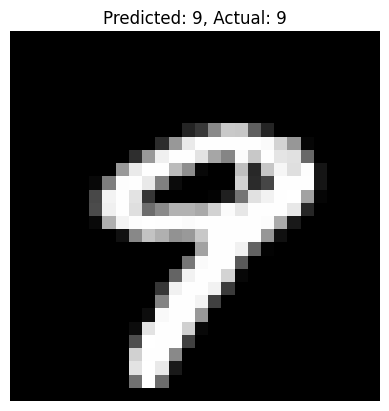

In [ ]:
for i in range(10):
    plot_sample(x_test[i], y_pred_classes[i], y_true[i])